In [37]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data
df = pd.read_csv('/Users/Serra/Desktop/bitirme/kullanılan csvler/serra_labeled.csv', delimiter=",")
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())


Dataset shape: (49987, 18)

Columns: ['Mekan_Adı', 'Kullanıcı_Adı', 'Yorum', 'Puan', 'Yorum_Tarihi', 'Restoran_Kategorisi', 'Restoran_Toplam_Yorum_Sayısı', 'Ortalama_Restoran_Puanı', 'Restoran_Adresi', 'sentiment_score', 'label', 'AI_Result', 'Tat_Score', 'Hizmet_Score', 'Ortam_Score', 'Fiyat-Performans_Score', 'Menü Çeşitliliği_Score', 'Temizlik_Score']


/var/folders/dl/882n_lw53xzc_3dfm3br35d40000gn/T/ipykernel_59093/1239980162.py:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/Serra/Desktop/bitirme/kullanılan csvler/serra_labeled.csv', delimiter=",")


In [38]:
df

,Mekan_Adı,Kullanıcı_Adı,Yorum,Puan,Yorum_Tarihi,Restoran_Kategorisi,Restoran_Toplam_Yorum_Sayısı,Ortalama_Restoran_Puanı,Restoran_Adresi,sentiment_score,label,AI_Result,Tat_Score,Hizmet_Score,Ortam_Score,Fiyat-Performans_Score,Menü Çeşitliliği_Score,Temizlik_Score
0,koru_firin_cafe_restaurant,Kerem Arslan,Aldığımız her şey çok lezzetli. Fiyatları da o...,5,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",0.939824,positive,"{\n ""categories"": {\n ""Tat"": 0.9,\n ""Hi...",0.9,NaN,NaN,0.0,NaN,NaN
1,koru_firin_cafe_restaurant,necla Şahin,"Fırın ürünleri gerçekten cok lezzetli, kahvalt...",5,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",0.957286,positive,"{\n ""categories"": {\n ""Tat"": 0.9,\n ""Hi...",0.9,0.9,NaN,0.8,NaN,NaN
2,koru_firin_cafe_restaurant,Bahattin CAKIR,30.12.2024 SABAH 2 MİSAFİRİMLE BERABER İŞ YERİ...,1,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",-0.999088,negative,"{\n ""categories"": {\n ""Tat"": -0.9,\n ""H...",-0.9,-0.8,NaN,-1.0,NaN,-1.0
3,koru_firin_cafe_restaurant,Gozde Bayer,Pasta urunleri lezzetli ve taze...Tavsiye ederim,5,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",0.913621,positive,"{\n ""categories"": {\n ""Tat"": 0.8,\n ...",0.8,NaN,NaN,NaN,NaN,NaN
4,koru_firin_cafe_restaurant,Ada,1 hafta öncesinden pasta siparişinde bulunduk ...,1,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",-0.999365,negative,"{\n ""categories"": {\n ""Tat"": null,\n ""H...",NaN,-1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49982,aynen_street_food,Mehmet Fındıkoğlu,Lezzetleri harika özellikle ottoman burger ve ...,5,2024-12-20,Restoran,208,4.7,"Emek, Bişkek Cd. 71/A, 06490 Çankaya/Ankara",0.722149,positive,"{\n ""categories"": {\n ""Tat"": 0.8,\n ...",0.8,NaN,-0.2,NaN,NaN,NaN
49983,aynen_street_food,refik kavalcı,Hamburgerlerinin çeşitliliğine ve etin tadına ...,5,2024-12-20,Restoran,208,4.7,"Emek, Bişkek Cd. 71/A, 06490 Çankaya/Ankara",0.985841,positive,"{\n ""categories"": {\n ""Tat"": 0.8,\n ...",0.8,NaN,NaN,NaN,0.8,NaN
49984,aynen_street_food,Simge Gizem Çoban,Ben cheeseburger ve mac and cheese topu tercih...,5,2024-12-20,Restoran,208,4.7,"Emek, Bişkek Cd. 71/A, 06490 Çankaya/Ankara",0.824888,positive,"{\n ""categories"": {\n ""Tat"": 1.0,\n ""Hi...",1.0,1.0,NaN,NaN,NaN,NaN
49985,aynen_street_food,Fatih ÜSTÜN,Küçük bir dükkan hamburgeri çok güzeldi. Küçük...,5,2024-12-20,Restoran,208,4.7,"Emek, Bişkek Cd. 71/A, 06490 Çankaya/Ankara",-0.793362,negative,"{\n ""categories"": {\n ""Tat"": 0.9,\n ""Hi...",0.9,NaN,0.8,NaN,NaN,NaN


# 1.1 Veri Hazırlığı & Temizlik

## 1. Null Değer Kontrolü


In [39]:
# Check null values in each column
null_counts = df.isnull().sum()
print("Null value counts per column:")
print(null_counts)

# Calculate percentage of null values
null_percentages = (null_counts / len(df)) * 100
print("\nNull value percentages per column:")
print(null_percentages)

# List columns with null values
columns_with_nulls = null_counts[null_counts > 0].index.tolist()
print("\nColumns containing null values:", columns_with_nulls)


Null value counts per column:
Mekan_Adı                           0
Kullanıcı_Adı                       0
Yorum                               0
Puan                                0
Yorum_Tarihi                        0
Restoran_Kategorisi                 0
Restoran_Toplam_Yorum_Sayısı        0
Ortalama_Restoran_Puanı             0
Restoran_Adresi                     0
sentiment_score                    10
label                              10
AI_Result                          10
Tat_Score                       17999
Hizmet_Score                    22165
Ortam_Score                     35530
Fiyat-Performans_Score          37229
Menü Çeşitliliği_Score          46418
Temizlik_Score                  43022
dtype: int64

Null value percentages per column:
Mekan_Adı                        0.000000
Kullanıcı_Adı                    0.000000
Yorum                            0.000000
Puan                             0.000000
Yorum_Tarihi                     0.000000
Restoran_Kategorisi        

In [40]:
df = df.replace('', np.nan)
df = df.dropna(subset=['sentiment_score', 'label', 'AI_Result'], how='any')
null_counts = df.isnull().sum()
print("Null value counts per column:")
print(null_counts)

Null value counts per column:
Mekan_Adı                           0
Kullanıcı_Adı                       0
Yorum                               0
Puan                                0
Yorum_Tarihi                        0
Restoran_Kategorisi                 0
Restoran_Toplam_Yorum_Sayısı        0
Ortalama_Restoran_Puanı             0
Restoran_Adresi                     0
sentiment_score                     0
label                               0
AI_Result                           0
Tat_Score                       17987
Hizmet_Score                    22152
Ortam_Score                     35515
Fiyat-Performans_Score          37212
Menü Çeşitliliği_Score          46402
Temizlik_Score                  43004
dtype: int64


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49967 entries, 0 to 49986
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Mekan_Adı                     49967 non-null  object 
 1   Kullanıcı_Adı                 49967 non-null  object 
 2   Yorum                         49967 non-null  object 
 3   Puan                          49967 non-null  int64  
 4   Yorum_Tarihi                  49967 non-null  object 
 5   Restoran_Kategorisi           49967 non-null  object 
 6   Restoran_Toplam_Yorum_Sayısı  49967 non-null  int64  
 7   Ortalama_Restoran_Puanı       49967 non-null  float64
 8   Restoran_Adresi               49967 non-null  object 
 9   sentiment_score               49967 non-null  float64
 10  label                         49967 non-null  object 
 11  AI_Result                     49967 non-null  object 
 12  Tat_Score                     31980 non-null  object 
 13  Hizmet

In [42]:
col = 'Tat_Score'  # or any column you want
# Try to convert, marking errors as NaN
converted = pd.to_numeric(df[col], errors='coerce')
# Find problematic cells (where conversion failed but value is not null/empty)
problematic = df.loc[converted.isna() & df[col].notna(), col]
print("⚠️ Problematic cells that could not be converted to float:")
print(problematic)


⚠️ Problematic cells that could not be converted to float:
4093     Adamların el lezetti var severek yemek yediğim...
42656                                       Balıklar taze.
Name: Tat_Score, dtype: object


In [43]:
cols_to_check = ['Tat_Score', 'Hizmet_Score']
for col in cols_to_check:
    converted = pd.to_numeric(df[col], errors='coerce')
    # Drop problematic rows
    df = df.loc[~(converted.isna() & df[col].notna())].copy()
    # Convert the column to float
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [44]:
df['Tat_Score'] = df['Tat_Score'].astype(float)
df['Hizmet_Score'] = df['Hizmet_Score'].astype(float)

## 3. Adres Parsing (Şehir, İlçe Çıkarma)


In [45]:
import re
import unicodedata
import pandas as pd

# Full list of Turkish provinces (İl)
TR_CITIES = {'ankara','istanbul','izmir'}

def _norm(s: str) -> str:
    """Basic normalize: unicode, collapse spaces, trim."""
    s = unicodedata.normalize("NFKC", str(s))
    s = re.sub(r'\s+', ' ', s).strip(' ,.;-')
    return s

def _clean_piece(s: str) -> str:
    """Drop postal codes & extra symbols from a piece likely holding İlçe."""
    s = re.sub(r'\b\d{4,6}\b', ' ', s)      # remove postal codes like 06490
    s = re.sub(r'[,.;]', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

def _turkish_title(s: str) -> str:
    """Simple title-case that preserves Turkish chars reasonably."""
    # Fix common dotted-i artifacts if present
    s = s.replace('i̇', 'i').replace('İ', 'İ')
    return s.title()

def extract_location_info(address: str):
    """Return (Ilce, Il) with Turkish casing; None, None if not found."""
    if pd.isna(address):
        return None, None

    addr = _norm(address)

    # 1) Strong pattern: "... <ilçe> / <il>" at the END of address
    # Allow letters, Turkish diacritics, dots and spaces in ilçe; only letters in il
    m = re.search(r'([A-Za-zÇĞİIÖŞÜçğıiöşü\.\-\s]+)\s*/\s*([A-Za-zÇĞİIÖŞÜçğıiöşü]+)\s*$', addr)
    if m:
        raw_ilce = _clean_piece(m.group(1))
        raw_il   = _clean_piece(m.group(2))
        il_l = raw_il.lower()
        if il_l in TR_CITIES:
            ilce = _turkish_title(raw_ilce.split()[-1]) if raw_ilce else None
            il   = _turkish_title(raw_il)
            return ilce or None, il

    # 2) No slash? Try to detect a city name near the end of string
    # Find last occurrence of a known city token
    tokens = [t.strip(' ,.;') for t in addr.split()]
    lowers = [t.lower() for t in tokens]
    city_pos = None
    for i in range(len(lowers)-1, -1, -1):
        if lowers[i] in TR_CITIES:
            city_pos = i
            break

    if city_pos is not None:
        il = _turkish_title(tokens[city_pos])
        # Guess district as the closest previous alpha token skipping numbers/abbr
        # e.g., "... 06490 Çankaya Ankara" -> take "Çankaya"
        ilce = None
        for j in range(city_pos-1, -1, -1):
            token = tokens[j]
            if re.fullmatch(r'\d+|no:?|sk\.?|cd\.?|mah\.?|mahallesi', token.lower()):
                continue
            if re.search(r'[A-Za-zÇĞİIÖŞÜçğıiöşü]', token):
                ilce = _turkish_title(token)
                break
        return ilce, il

    # 3) Give up if we can't confidently parse
    return None, None

# ---- Apply to your DataFrame ----
address_column = 'Restoran_Adresi'  # change if needed
if address_column in df.columns:
    pairs = df[address_column].apply(extract_location_info)
    df[['Ilce', 'Il']] = pd.DataFrame(pairs.tolist(), index=df.index)

    # Quick sanity prints
    print("İl dağılımı (top 10):")
    print(df['Il'].value_counts(dropna=True).head(10))
    print("\nİlçe dağılımı (top 10):")
    print(df['Ilce'].value_counts(dropna=True).head(10))
else:
    print(f"Address column '{address_column}' not found. Available columns:", df.columns.tolist())


İl dağılımı (top 10):
Il
Ankara    48151
Name: count, dtype: int64

İlçe dağılımı (top 10):
Ilce
Çankaya          7588
Altındağ         6376
Keçiören         6369
Etimesgut        6160
Mamak            5412
Pursaklar        3682
Yenimahalle      2883
Sincan           2693
Kahramankazan    2523
Beypazarı        2436
Name: count, dtype: int64


In [46]:
df.head()

,Mekan_Adı,Kullanıcı_Adı,Yorum,Puan,Yorum_Tarihi,Restoran_Kategorisi,Restoran_Toplam_Yorum_Sayısı,Ortalama_Restoran_Puanı,Restoran_Adresi,sentiment_score,label,AI_Result,Tat_Score,Hizmet_Score,Ortam_Score,Fiyat-Performans_Score,Menü Çeşitliliği_Score,Temizlik_Score,Ilce,Il
0,koru_firin_cafe_restaurant,Kerem Arslan,Aldığımız her şey çok lezzetli. Fiyatları da o...,5,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",0.939824,positive,"{\n ""categories"": {\n ""Tat"": 0.9,\n ""Hi...",0.9,NaN,NaN,0.0,NaN,NaN,Etimesgut,Ankara
1,koru_firin_cafe_restaurant,necla Şahin,"Fırın ürünleri gerçekten cok lezzetli, kahvalt...",5,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",0.957286,positive,"{\n ""categories"": {\n ""Tat"": 0.9,\n ""Hi...",0.9,0.9,NaN,0.8,NaN,NaN,Etimesgut,Ankara
2,koru_firin_cafe_restaurant,Bahattin CAKIR,30.12.2024 SABAH 2 MİSAFİRİMLE BERABER İŞ YERİ...,1,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",-0.999088,negative,"{\n ""categories"": {\n ""Tat"": -0.9,\n ""H...",-0.9,-0.8,NaN,-1.0,NaN,-1.0,Etimesgut,Ankara
3,koru_firin_cafe_restaurant,Gozde Bayer,Pasta urunleri lezzetli ve taze...Tavsiye ederim,5,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",0.913621,positive,"{\n ""categories"": {\n ""Tat"": 0.8,\n ...",0.8,NaN,NaN,NaN,NaN,NaN,Etimesgut,Ankara
4,koru_firin_cafe_restaurant,Ada,1 hafta öncesinden pasta siparişinde bulunduk ...,1,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",-0.999365,negative,"{\n ""categories"": {\n ""Tat"": null,\n ""H...",NaN,-1.0,NaN,NaN,NaN,NaN,Etimesgut,Ankara


In [47]:
df["Ilce"].value_counts()

Ilce
Çankaya          7588
Altındağ         6376
Keçiören         6369
Etimesgut        6160
Mamak            5412
Pursaklar        3682
Yenimahalle      2883
Sincan           2693
Kahramankazan    2523
Beypazarı        2436
Elmadağ          1005
Kalecik           247
Gölbaşı           175
Akyurt             98
No:6               96
Ulus               96
Eryaman            90
Çayyolu            88
No:59              66
35;;A              53
No:66/C            15
Name: count, dtype: int64

In [48]:
# Group by restaurant name and calculate positive review ratio
restaurant_stats = df.groupby('Mekan_Adı').agg(
    total_reviews=('Yorum', 'count'),
    positive_reviews=('label', lambda x: (x == 'positive').sum())
).reset_index()

# Calculate the ratio of positive reviews
restaurant_stats['positive_ratio'] = restaurant_stats['positive_reviews'] / restaurant_stats['total_reviews']


In [49]:
# Merge back to the original dataframe
df_with_stats = df.merge(restaurant_stats, on='Mekan_Adı', how='left')
df_with_stats

,Mekan_Adı,Kullanıcı_Adı,Yorum,Puan,Yorum_Tarihi,Restoran_Kategorisi,Restoran_Toplam_Yorum_Sayısı,Ortalama_Restoran_Puanı,Restoran_Adresi,sentiment_score,...,Hizmet_Score,Ortam_Score,Fiyat-Performans_Score,Menü Çeşitliliği_Score,Temizlik_Score,Ilce,Il,total_reviews,positive_reviews,positive_ratio
0,koru_firin_cafe_restaurant,Kerem Arslan,Aldığımız her şey çok lezzetli. Fiyatları da o...,5,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",0.939824,...,NaN,NaN,0.0,NaN,NaN,Etimesgut,Ankara,77,44,0.571429
1,koru_firin_cafe_restaurant,necla Şahin,"Fırın ürünleri gerçekten cok lezzetli, kahvalt...",5,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",0.957286,...,0.9,NaN,0.8,NaN,NaN,Etimesgut,Ankara,77,44,0.571429
2,koru_firin_cafe_restaurant,Bahattin CAKIR,30.12.2024 SABAH 2 MİSAFİRİMLE BERABER İŞ YERİ...,1,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",-0.999088,...,-0.8,NaN,-1.0,NaN,-1.0,Etimesgut,Ankara,77,44,0.571429
3,koru_firin_cafe_restaurant,Gozde Bayer,Pasta urunleri lezzetli ve taze...Tavsiye ederim,5,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",0.913621,...,NaN,NaN,NaN,NaN,NaN,Etimesgut,Ankara,77,44,0.571429
4,koru_firin_cafe_restaurant,Ada,1 hafta öncesinden pasta siparişinde bulunduk ...,1,2025-01-20,Tatlı & Kahve,886,4.2,"Yeni Bağlıca Mah. Zirve Cad. No: 91G, D:6, 068...",-0.999365,...,-1.0,NaN,NaN,NaN,NaN,Etimesgut,Ankara,77,44,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49960,aynen_street_food,Mehmet Fındıkoğlu,Lezzetleri harika özellikle ottoman burger ve ...,5,2024-12-20,Restoran,208,4.7,"Emek, Bişkek Cd. 71/A, 06490 Çankaya/Ankara",0.722149,...,NaN,-0.2,NaN,NaN,NaN,Çankaya,Ankara,99,70,0.707071
49961,aynen_street_food,refik kavalcı,Hamburgerlerinin çeşitliliğine ve etin tadına ...,5,2024-12-20,Restoran,208,4.7,"Emek, Bişkek Cd. 71/A, 06490 Çankaya/Ankara",0.985841,...,NaN,NaN,NaN,0.8,NaN,Çankaya,Ankara,99,70,0.707071
49962,aynen_street_food,Simge Gizem Çoban,Ben cheeseburger ve mac and cheese topu tercih...,5,2024-12-20,Restoran,208,4.7,"Emek, Bişkek Cd. 71/A, 06490 Çankaya/Ankara",0.824888,...,1.0,NaN,NaN,NaN,NaN,Çankaya,Ankara,99,70,0.707071
49963,aynen_street_food,Fatih ÜSTÜN,Küçük bir dükkan hamburgeri çok güzeldi. Küçük...,5,2024-12-20,Restoran,208,4.7,"Emek, Bişkek Cd. 71/A, 06490 Çankaya/Ankara",-0.793362,...,NaN,0.8,NaN,NaN,NaN,Çankaya,Ankara,99,70,0.707071


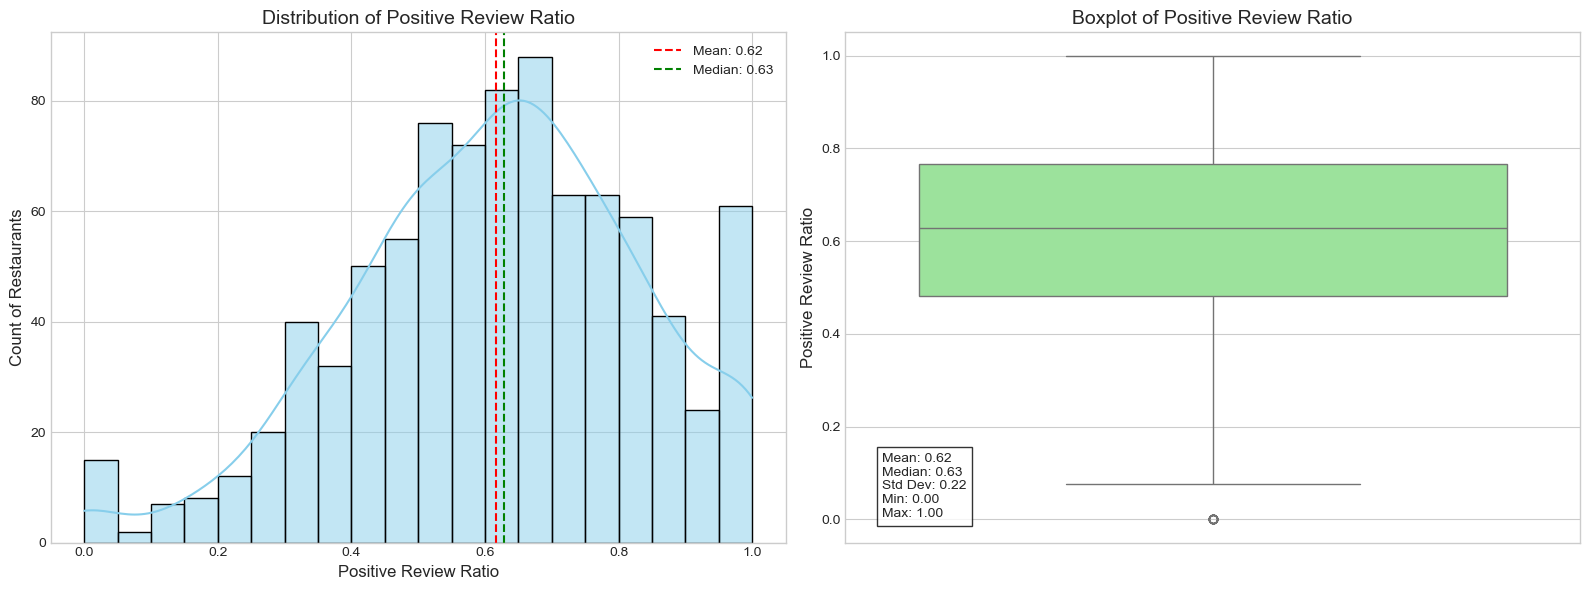

In [50]:
# Set the style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of positive_ratio
sns.histplot(restaurant_stats['positive_ratio'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Positive Review Ratio', fontsize=14)
axes[0].set_xlabel('Positive Review Ratio', fontsize=12)
axes[0].set_ylabel('Count of Restaurants', fontsize=12)
axes[0].axvline(x=restaurant_stats['positive_ratio'].mean(), color='red', linestyle='--', 
               label=f'Mean: {restaurant_stats["positive_ratio"].mean():.2f}')
axes[0].axvline(x=restaurant_stats['positive_ratio'].median(), color='green', linestyle='--', 
               label=f'Median: {restaurant_stats["positive_ratio"].median():.2f}')
axes[0].legend()

# Boxplot of positive_ratio
sns.boxplot(y=restaurant_stats['positive_ratio'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of Positive Review Ratio', fontsize=14)
axes[1].set_ylabel('Positive Review Ratio', fontsize=12)

# Add some statistics as text
stats_text = (f"Mean: {restaurant_stats['positive_ratio'].mean():.2f}\n"
              f"Median: {restaurant_stats['positive_ratio'].median():.2f}\n"
              f"Std Dev: {restaurant_stats['positive_ratio'].std():.2f}\n"
              f"Min: {restaurant_stats['positive_ratio'].min():.2f}\n"
              f"Max: {restaurant_stats['positive_ratio'].max():.2f}")
axes[1].text(0.05, 0.05, stats_text, transform=axes[1].transAxes, 
            bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [51]:
df_with_stats.columns

Index(['Mekan_Adı', 'Kullanıcı_Adı', 'Yorum', 'Puan', 'Yorum_Tarihi',
       'Restoran_Kategorisi', 'Restoran_Toplam_Yorum_Sayısı',
       'Ortalama_Restoran_Puanı', 'Restoran_Adresi', 'sentiment_score',
       'label', 'AI_Result', 'Tat_Score', 'Hizmet_Score', 'Ortam_Score',
       'Fiyat-Performans_Score', 'Menü Çeşitliliği_Score', 'Temizlik_Score',
       'Ilce', 'Il', 'total_reviews', 'positive_reviews', 'positive_ratio'],
      dtype='object')

In [52]:
df_with_stats = df_with_stats[['Mekan_Adı', 'Yorum', 'Restoran_Kategorisi', 
       'Tat_Score', 'Hizmet_Score', 'Ortam_Score',
       'Fiyat-Performans_Score', 'Menü Çeşitliliği_Score', 'Temizlik_Score',
       'Ilce', 'Il', 'total_reviews', 'positive_reviews', 'positive_ratio']]

In [53]:
df_with_stats.head()

,Mekan_Adı,Yorum,Restoran_Kategorisi,Tat_Score,Hizmet_Score,Ortam_Score,Fiyat-Performans_Score,Menü Çeşitliliği_Score,Temizlik_Score,Ilce,Il,total_reviews,positive_reviews,positive_ratio
0,koru_firin_cafe_restaurant,Aldığımız her şey çok lezzetli. Fiyatları da o...,Tatlı & Kahve,0.9,NaN,NaN,0.0,NaN,NaN,Etimesgut,Ankara,77,44,0.571429
1,koru_firin_cafe_restaurant,"Fırın ürünleri gerçekten cok lezzetli, kahvalt...",Tatlı & Kahve,0.9,0.9,NaN,0.8,NaN,NaN,Etimesgut,Ankara,77,44,0.571429
2,koru_firin_cafe_restaurant,30.12.2024 SABAH 2 MİSAFİRİMLE BERABER İŞ YERİ...,Tatlı & Kahve,-0.9,-0.8,NaN,-1.0,NaN,-1.0,Etimesgut,Ankara,77,44,0.571429
3,koru_firin_cafe_restaurant,Pasta urunleri lezzetli ve taze...Tavsiye ederim,Tatlı & Kahve,0.8,NaN,NaN,NaN,NaN,NaN,Etimesgut,Ankara,77,44,0.571429
4,koru_firin_cafe_restaurant,1 hafta öncesinden pasta siparişinde bulunduk ...,Tatlı & Kahve,NaN,-1.0,NaN,NaN,NaN,NaN,Etimesgut,Ankara,77,44,0.571429


In [54]:
# Create a function to count non-null values for specific columns
def count_non_null_reviews_by_category(df):
    # Define the category columns we want to count
    category_cols = [
        'Tat_Score',
        'Hizmet_Score',
        'Ortam_Score',
        'Fiyat-Performans_Score',
        'Menü Çeşitliliği_Score',
        'Temizlik_Score'
    ]
    
    # Group by restaurant name and count non-null values for each category
    category_counts = df.groupby('Mekan_Adı')[category_cols].count().reset_index()
    
    # Rename columns to indicate these are counts of non-null reviews
    for col in category_cols:
        category_counts = category_counts.rename(
            columns={col: f"{col.replace('_Score', '')}_comment_count"}
        )
    
    # Merge with the original dataframe
    df_with_counts = df.merge(category_counts, on='Mekan_Adı', how='left')
    
    print(f"Added {len(category_cols)} new count columns")
    print("Sample of the first 5 rows with new count columns:")
    
    return df_with_counts

# Apply the function
df_with_stats = count_non_null_reviews_by_category(df_with_stats)
df_with_stats.head()


Added 6 new count columns
Sample of the first 5 rows with new count columns:


,Mekan_Adı,Yorum,Restoran_Kategorisi,Tat_Score,Hizmet_Score,Ortam_Score,Fiyat-Performans_Score,Menü Çeşitliliği_Score,Temizlik_Score,Ilce,Il,total_reviews,positive_reviews,positive_ratio,Tat_comment_count,Hizmet_comment_count,Ortam_comment_count,Fiyat-Performans_comment_count,Menü Çeşitliliği_comment_count,Temizlik_comment_count
0,koru_firin_cafe_restaurant,Aldığımız her şey çok lezzetli. Fiyatları da o...,Tatlı & Kahve,0.9,NaN,NaN,0.0,NaN,NaN,Etimesgut,Ankara,77,44,0.571429,47,49,13,21,11,17
1,koru_firin_cafe_restaurant,"Fırın ürünleri gerçekten cok lezzetli, kahvalt...",Tatlı & Kahve,0.9,0.9,NaN,0.8,NaN,NaN,Etimesgut,Ankara,77,44,0.571429,47,49,13,21,11,17
2,koru_firin_cafe_restaurant,30.12.2024 SABAH 2 MİSAFİRİMLE BERABER İŞ YERİ...,Tatlı & Kahve,-0.9,-0.8,NaN,-1.0,NaN,-1.0,Etimesgut,Ankara,77,44,0.571429,47,49,13,21,11,17
3,koru_firin_cafe_restaurant,Pasta urunleri lezzetli ve taze...Tavsiye ederim,Tatlı & Kahve,0.8,NaN,NaN,NaN,NaN,NaN,Etimesgut,Ankara,77,44,0.571429,47,49,13,21,11,17
4,koru_firin_cafe_restaurant,1 hafta öncesinden pasta siparişinde bulunduk ...,Tatlı & Kahve,NaN,-1.0,NaN,NaN,NaN,NaN,Etimesgut,Ankara,77,44,0.571429,47,49,13,21,11,17


In [55]:
df = df_with_stats

In [56]:
df.drop(columns=['Yorum'], inplace=True)

In [57]:
# Group by Mekan_Adı (restaurant name)
restaurant_grouped = df.groupby('Mekan_Adı').agg({
    'Restoran_Kategorisi': 'first',
    'Tat_Score': 'mean',
    'Hizmet_Score': 'mean',
    'Ortam_Score': 'mean',
    'Fiyat-Performans_Score': 'mean',
    'Menü Çeşitliliği_Score': 'mean',
    'Temizlik_Score': 'mean',
    'Ilce': 'first',
    'Il': 'first',
    'total_reviews': 'first',
    'positive_reviews': 'first',
    'positive_ratio': 'first',
    'Tat_comment_count': 'first',  # or 'sum' if row-level counts
    'Hizmet_comment_count': 'first',
    'Ortam_comment_count': 'first',
    'Fiyat-Performans_comment_count': 'first',
    'Menü Çeşitliliği_comment_count': 'first',
    'Temizlik_comment_count': 'first'
}).reset_index()

# Show restaurant count and preview of the data
print(f"Total number of unique restaurants: {len(restaurant_grouped)}")
restaurant_grouped.head()


Total number of unique restaurants: 870


,Mekan_Adı,Restoran_Kategorisi,Tat_Score,Hizmet_Score,Ortam_Score,Fiyat-Performans_Score,Menü Çeşitliliği_Score,Temizlik_Score,Ilce,Il,total_reviews,positive_reviews,positive_ratio,Tat_comment_count,Hizmet_comment_count,Ortam_comment_count,Fiyat-Performans_comment_count,Menü Çeşitliliği_comment_count,Temizlik_comment_count
0,01_adana_durumluk,Restoran,0.585714,0.406667,0.275000,0.138889,1.000000,0.150000,Etimesgut,Ankara,56,27,0.482143,35,15,4,18,1,4
1,01_adanali_ismail_ustanin_yeri,Restoran,0.496000,-0.015625,0.436000,-0.526667,-0.215789,-0.060000,Çankaya,Ankara,88,41,0.465909,50,32,25,30,19,5
2,06_ankara_kokorec,Restoran,0.766667,0.955556,-0.300000,0.600000,NaN,0.957143,Pursaklar,Ankara,40,29,0.725000,24,9,1,3,0,7
3,1983beyoglu_cikolatakahve_kecioren,Fast Food,0.765625,0.584211,0.783333,0.011111,0.540000,0.900000,Keçiören,Ankara,63,45,0.714286,32,19,24,9,5,1
4,19_pide_kebap_ustanin_yeri,Restoran,0.676667,0.618750,0.350000,0.416667,0.500000,0.450000,Kahramankazan,Ankara,49,28,0.571429,30,16,4,12,1,4


In [58]:
df = restaurant_grouped

In [59]:
# float veya int tipindeki kolonları al
category_columns = [
    col for col in df.columns 
    if pd.api.types.is_float_dtype(df[col]) or pd.api.types.is_integer_dtype(df[col])
]

if category_columns:
    for col in category_columns:
        min_val = df[col].min()
        max_val = df[col].max()
        if pd.notnull(min_val) and pd.notnull(max_val) and max_val != min_val:
            # overwrite same column with normalized values
            df[col] = (df[col] - min_val) / (max_val - min_val)
            print(f"Normalized {col}: Min={df[col].min():.2f}, Max={df[col].max():.2f}")
        else:
            print(f"Skipped {col}: constant or empty values")
else:
    print("No numeric category score columns found.")

Normalized Tat_Score: Min=0.00, Max=1.00
Normalized Hizmet_Score: Min=0.00, Max=1.00
Normalized Ortam_Score: Min=0.00, Max=1.00
Normalized Fiyat-Performans_Score: Min=0.00, Max=1.00
Normalized Menü Çeşitliliği_Score: Min=0.00, Max=1.00
Normalized Temizlik_Score: Min=0.00, Max=1.00
Normalized total_reviews: Min=0.00, Max=1.00
Normalized positive_reviews: Min=0.00, Max=1.00
Normalized positive_ratio: Min=0.00, Max=1.00
Normalized Tat_comment_count: Min=0.00, Max=1.00
Normalized Hizmet_comment_count: Min=0.00, Max=1.00
Normalized Ortam_comment_count: Min=0.00, Max=1.00
Normalized Fiyat-Performans_comment_count: Min=0.00, Max=1.00
Normalized Menü Çeşitliliği_comment_count: Min=0.00, Max=1.00
Normalized Temizlik_comment_count: Min=0.00, Max=1.00


In [60]:
df.head(10)

,Mekan_Adı,Restoran_Kategorisi,Tat_Score,Hizmet_Score,Ortam_Score,Fiyat-Performans_Score,Menü Çeşitliliği_Score,Temizlik_Score,Ilce,Il,total_reviews,positive_reviews,positive_ratio,Tat_comment_count,Hizmet_comment_count,Ortam_comment_count,Fiyat-Performans_comment_count,Menü Çeşitliliği_comment_count,Temizlik_comment_count
0,01_adana_durumluk,Restoran,0.792857,0.703333,0.637500,0.569444,1.000000,0.575000,Etimesgut,Ankara,0.282051,0.284211,0.482143,0.275591,0.103448,0.042105,0.285714,0.041667,0.121212
1,01_adanali_ismail_ustanin_yeri,Restoran,0.748000,0.492188,0.718000,0.236667,0.392105,0.470000,Çankaya,Ankara,0.446154,0.431579,0.465909,0.393701,0.220690,0.263158,0.476190,0.791667,0.151515
2,06_ankara_kokorec,Restoran,0.883333,0.977778,0.350000,0.800000,NaN,0.978571,Pursaklar,Ankara,0.200000,0.305263,0.725000,0.188976,0.062069,0.010526,0.047619,0.000000,0.212121
3,1983beyoglu_cikolatakahve_kecioren,Fast Food,0.882812,0.792105,0.891667,0.505556,0.770000,0.950000,Keçiören,Ankara,0.317949,0.473684,0.714286,0.251969,0.131034,0.252632,0.142857,0.208333,0.030303
4,19_pide_kebap_ustanin_yeri,Restoran,0.838333,0.809375,0.675000,0.708333,0.750000,0.725000,Kahramankazan,Ankara,0.246154,0.294737,0.571429,0.236220,0.110345,0.042105,0.190476,0.041667,0.121212
5,1_by_tantuni_atapark,Restoran,0.757576,0.582143,0.675000,0.637500,0.450000,0.320833,Keçiören,Ankara,0.446154,0.442105,0.477273,0.259843,0.193103,0.042105,0.253968,0.083333,0.181818
6,2a_durum_kafe,Fast Food,NaN,0.050000,NaN,NaN,NaN,NaN,Kahramankazan,Ankara,0.020513,0.042105,0.800000,0.000000,0.006897,0.000000,0.000000,0.000000,0.000000
7,52_karadeniz_balik_lokantasi_balik_satis_manav,Restoran,0.733871,0.623529,0.720000,0.623077,0.840000,0.722727,Etimesgut,Ankara,0.338462,0.389474,0.552239,0.244094,0.117241,0.052632,0.206349,0.208333,0.333333
8,724_corbaizgara,Restoran,0.734146,0.752500,0.800000,0.570000,0.700000,0.235000,Etimesgut,Ankara,0.394872,0.389474,0.474359,0.322835,0.137931,0.073684,0.238095,0.041667,0.151515
9,99_sumela_et_lokantasi,Restoran,0.854808,0.716667,0.753333,0.656667,0.878571,0.840625,Çankaya,Ankara,0.466667,0.631579,0.652174,0.409449,0.206897,0.157895,0.238095,0.291667,0.484848


### BOŞ OLANLAR

In [61]:
cols = [
    "Tat_comment_count",
    "Hizmet_comment_count",
    "Ortam_comment_count",
    "Fiyat-Performans_comment_count",
    "Menü Çeşitliliği_comment_count",
    "Temizlik_comment_count"
]

# Count rows equal to 0 for each column
print((df[cols] == 0).sum())

Tat_comment_count                  21
Hizmet_comment_count               30
Ortam_comment_count                66
Fiyat-Performans_comment_count     69
Menü Çeşitliliği_comment_count    190
Temizlik_comment_count             86
dtype: int64


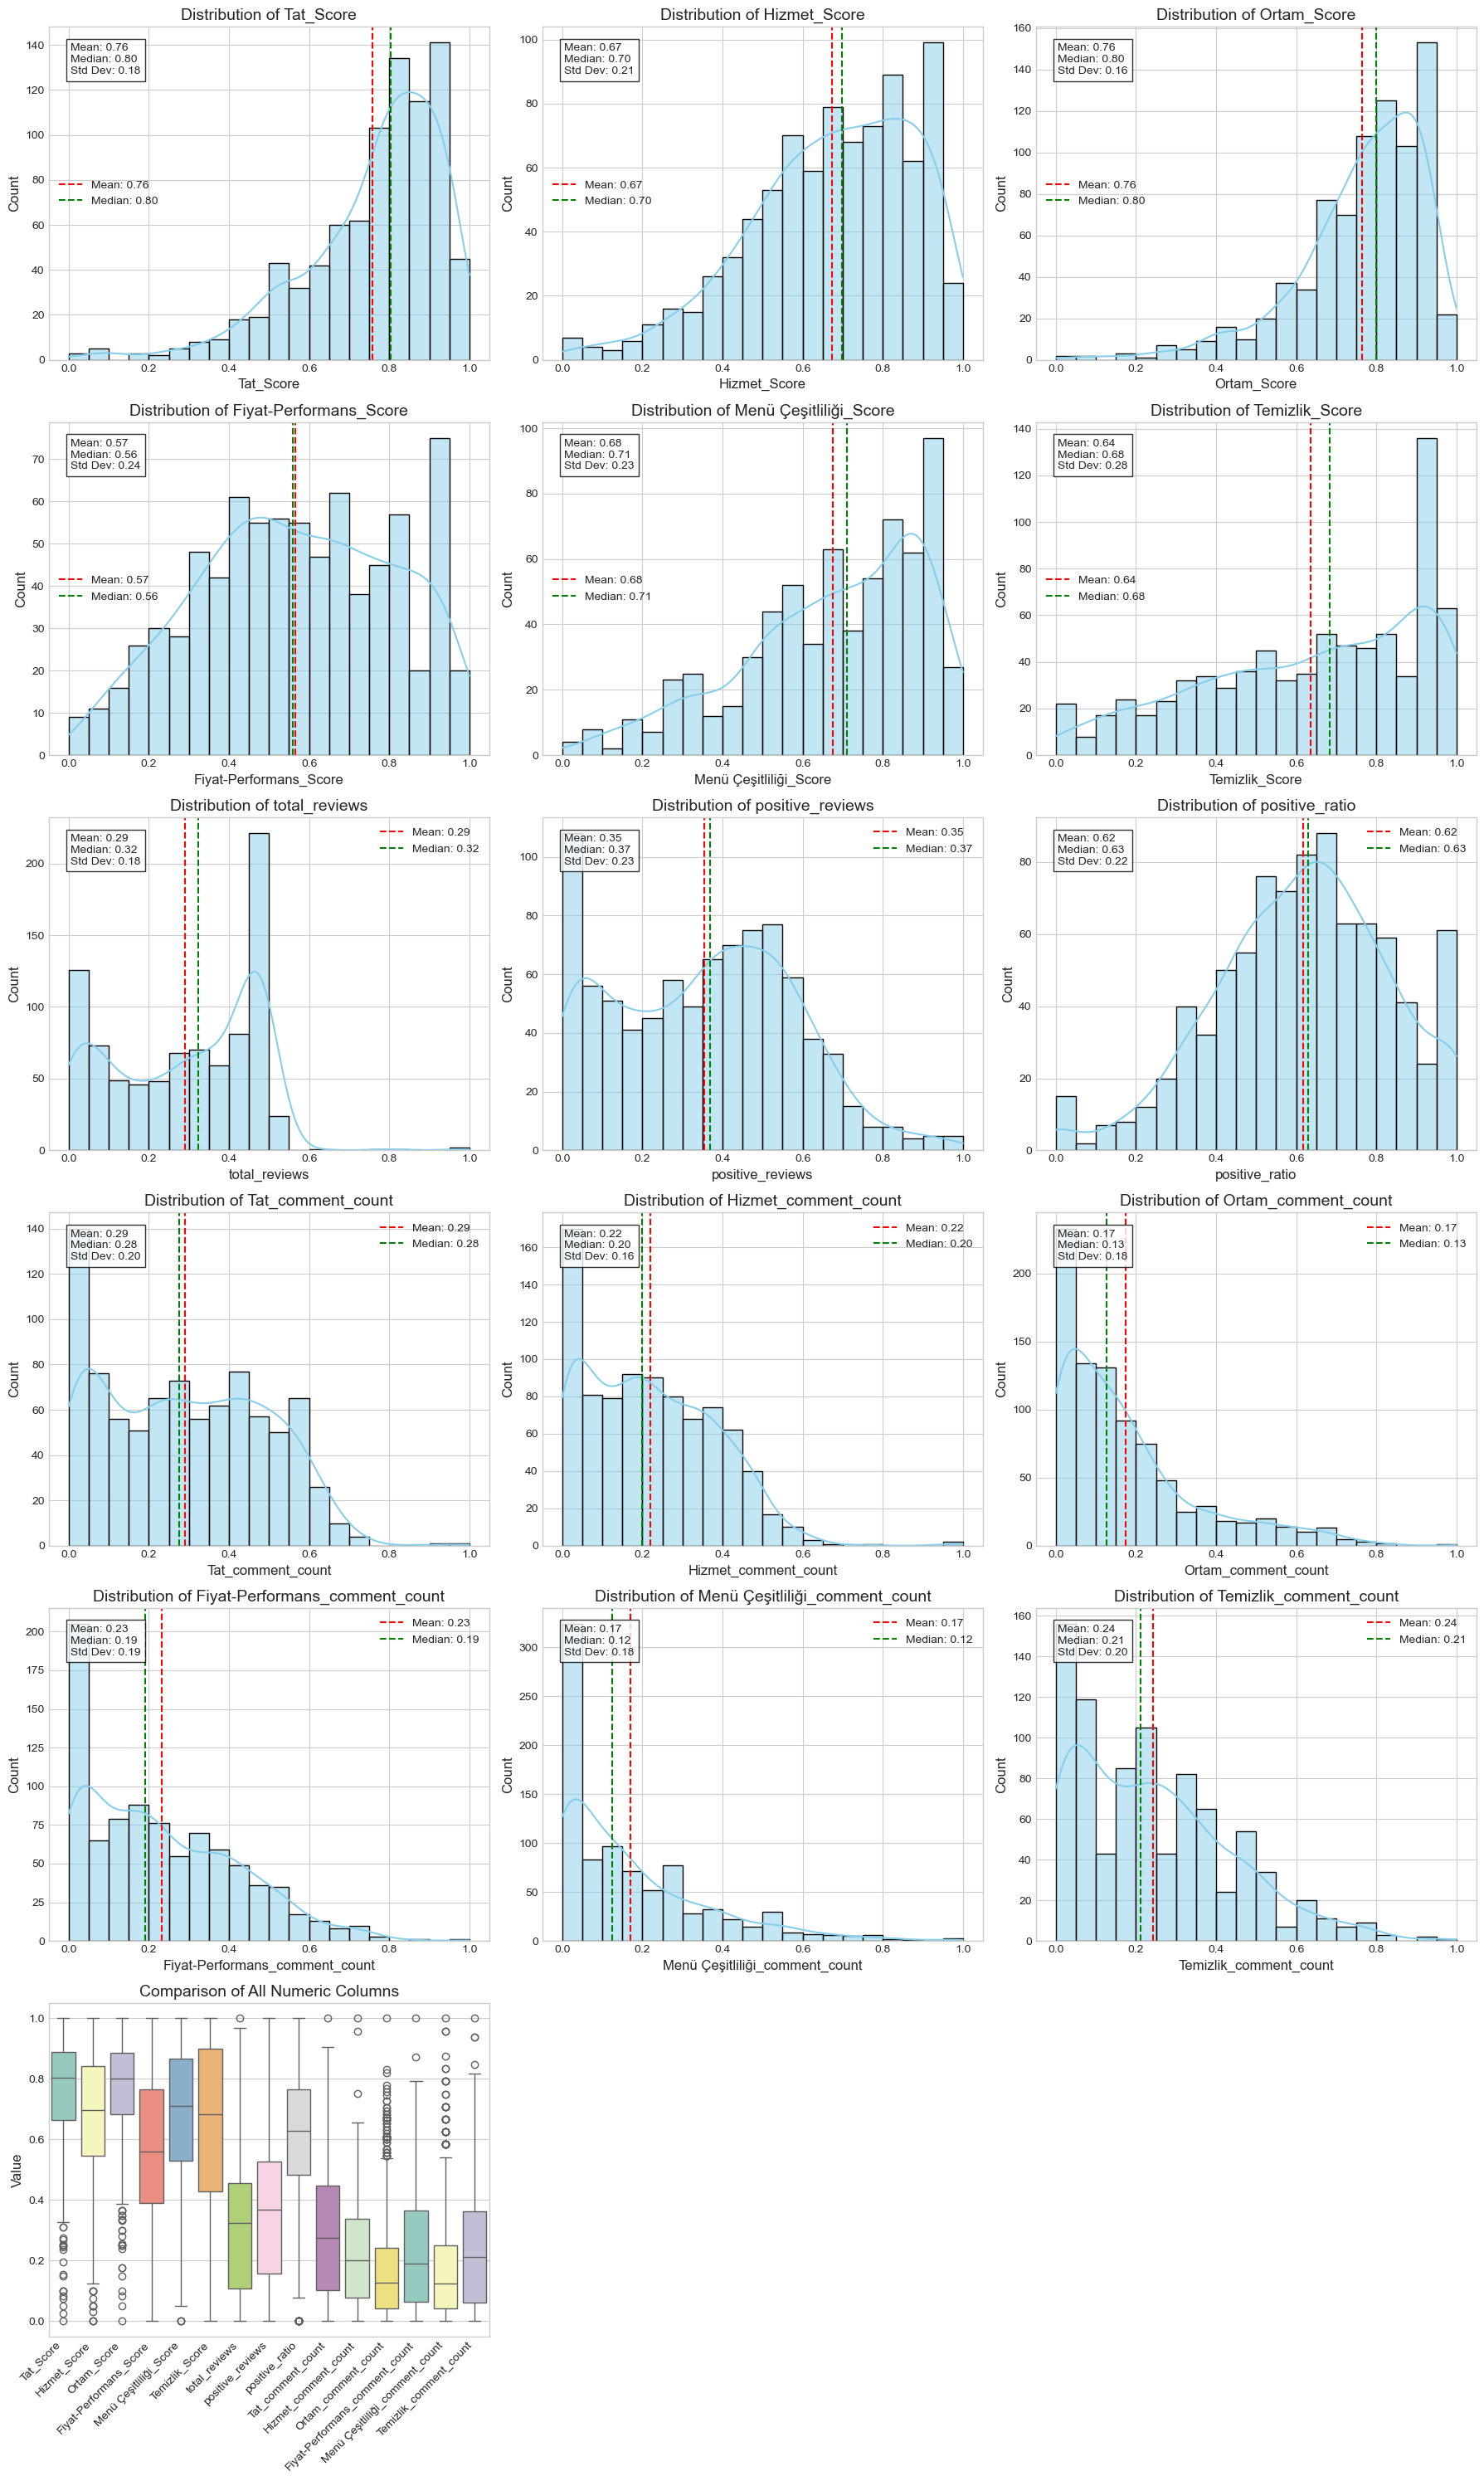

In [62]:
import math
# Stil
plt.style.use('seaborn-v0_8-whitegrid')

# Sayısal kolonlar
score_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Kaç subplot lazım? (her bir numeric kolon için 1 + 1 tane boxplot)
n_plots = len(score_columns) + 1  
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

plt.figure(figsize=(6*n_cols, 5*n_rows))

# Histogramlar
for i, column in enumerate(score_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    data = df[column].dropna()
    
    if len(data) > 0:
        sns.histplot(data, kde=True, bins=20, color='skyblue')
        plt.axvline(data.mean(), color='red', linestyle='--', label=f'Mean: {data.mean():.2f}')
        plt.axvline(data.median(), color='green', linestyle='--', label=f'Median: {data.median():.2f}')
        plt.title(f'Distribution of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.legend()
        stats_text = (f"Mean: {data.mean():.2f}\n"
                      f"Median: {data.median():.2f}\n"
                      f"Std Dev: {data.std():.2f}")
        plt.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction',
                   bbox=dict(facecolor='white', alpha=0.8), va='top')
    else:
        plt.text(0.5, 0.5, f"No data available for {column}", 
                ha='center', va='center', fontsize=12)

# Boxplot en sona
plt.subplot(n_rows, n_cols, n_plots)
boxplot_data = [df[col].dropna() for col in score_columns]
sns.boxplot(data=boxplot_data, palette='Set3')
plt.xticks(range(len(score_columns)), score_columns, rotation=45, ha='right')
plt.title('Comparison of All Numeric Columns', fontsize=14)
plt.ylabel('Value', fontsize=12)

plt.tight_layout()
plt.show()



### Kendi risk algılımıza göre weight yaptık

In [63]:
cols = [
    "Tat_comment_count",
    "Hizmet_comment_count",
    "Ortam_comment_count",
    "Fiyat-Performans_comment_count",
    "Menü Çeşitliliği_comment_count",
    "Temizlik_comment_count"
]
count_table = (df[cols] != 0).sum().reset_index()
print(count_table)

                            index    0
0               Tat_comment_count  849
1            Hizmet_comment_count  840
2             Ortam_comment_count  804
3  Fiyat-Performans_comment_count  801
4  Menü Çeşitliliği_comment_count  680
5          Temizlik_comment_count  784


In [64]:
toplam = count_table[0].sum()
toplam

4758

In [65]:
ratios = []
for i in (count_table[0]):
    ratios.append(i/toplam)


In [66]:
ratios

[0.17843631778058008,
 0.17654476670870115,
 0.16897856242118536,
 0.16834804539722573,
 0.14291719209751996,
 0.16477511559478772]

In [67]:
weight_calculation = df[["Mekan_Adı", "Tat_Score", "Hizmet_Score", "Ortam_Score", "Fiyat-Performans_Score", "Menü Çeşitliliği_Score", "Temizlik_Score", "Tat_comment_count", "Hizmet_comment_count", "Ortam_comment_count", "Fiyat-Performans_comment_count", "Menü Çeşitliliği_comment_count", "Temizlik_comment_count"]]
weight_calculation

,Mekan_Adı,Tat_Score,Hizmet_Score,Ortam_Score,Fiyat-Performans_Score,Menü Çeşitliliği_Score,Temizlik_Score,Tat_comment_count,Hizmet_comment_count,Ortam_comment_count,Fiyat-Performans_comment_count,Menü Çeşitliliği_comment_count,Temizlik_comment_count
0,01_adana_durumluk,0.792857,0.703333,0.637500,0.569444,1.000000,0.575000,0.275591,0.103448,0.042105,0.285714,0.041667,0.121212
1,01_adanali_ismail_ustanin_yeri,0.748000,0.492188,0.718000,0.236667,0.392105,0.470000,0.393701,0.220690,0.263158,0.476190,0.791667,0.151515
2,06_ankara_kokorec,0.883333,0.977778,0.350000,0.800000,NaN,0.978571,0.188976,0.062069,0.010526,0.047619,0.000000,0.212121
3,1983beyoglu_cikolatakahve_kecioren,0.882812,0.792105,0.891667,0.505556,0.770000,0.950000,0.251969,0.131034,0.252632,0.142857,0.208333,0.030303
4,19_pide_kebap_ustanin_yeri,0.838333,0.809375,0.675000,0.708333,0.750000,0.725000,0.236220,0.110345,0.042105,0.190476,0.041667,0.121212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,park_cafe_altinpark,0.908929,0.927419,0.916406,0.930000,0.900000,0.881250,0.440945,0.427586,0.673684,0.158730,0.250000,0.484848
866,park_mangal,0.762705,0.663492,0.773214,0.495000,0.518750,0.765000,0.480315,0.434483,0.294737,0.634921,0.333333,0.303030
867,pasaport_pizza_beypazari,0.652703,0.471429,0.778571,0.178571,0.740000,0.512500,0.291339,0.289655,0.221053,0.222222,0.208333,0.121212
868,pasaport_pizza_etimesgut,0.695238,0.597581,0.659375,0.429545,0.433333,0.588889,0.496063,0.427586,0.168421,0.349206,0.125000,0.545455


In [ ]:
# Create weighted scores by multiplying each score by its corresponding comment count ratio
weight_calculation['Weighted_Tat'] = weight_calculation['Tat_Score'] * weight_calculation['Tat_comment_count'] * ratios[0]
weight_calculation['Weighted_Hizmet'] = weight_calculation['Hizmet_Score'] * weight_calculation['Hizmet_comment_count'] * ratios[1]
weight_calculation['Weighted_Ortam'] = weight_calculation['Ortam_Score'] * weight_calculation['Ortam_comment_count'] * ratios[2]
weight_calculation['Weighted_Fiyat'] = weight_calculation['Fiyat-Performans_Score'] * weight_calculation['Fiyat-Performans_comment_count'] * ratios[3]
weight_calculation['Weighted_Menu'] = weight_calculation['Menü Çeşitliliği_Score'] * weight_calculation['Menü Çeşitliliği_comment_count'] * ratios[4]
weight_calculation['Weighted_Temizlik'] = weight_calculation['Temizlik_Score'] * weight_calculation['Temizlik_comment_count'] * ratios[5]

# Calculate total weighted score (ignoring NaN values)
weight_calculation['Total_Weighted_Score'] = weight_calculation[[
    'Weighted_Tat', 'Weighted_Hizmet', 'Weighted_Ortam',
    'Weighted_Fiyat', 'Weighted_Menu', 'Weighted_Temizlik'
]].sum(axis=1, skipna=True)

In [69]:
# Display first few rows with new columns
weight_calculation.head()

,Mekan_Adı,Tat_Score,Hizmet_Score,Ortam_Score,Fiyat-Performans_Score,Menü Çeşitliliği_Score,Temizlik_Score,Tat_comment_count,Hizmet_comment_count,Ortam_comment_count,Fiyat-Performans_comment_count,Menü Çeşitliliği_comment_count,Temizlik_comment_count,Weighted_Tat,Weighted_Hizmet,Weighted_Ortam,Weighted_Fiyat,Weighted_Menu,Weighted_Temizlik,Total_Weighted_Score
0,01_adana_durumluk,0.792857,0.703333,0.637500,0.569444,1.000000,0.575000,0.275591,0.103448,0.042105,0.285714,0.041667,0.121212,0.038989,0.012845,0.004536,0.027390,0.005955,0.011484,0.101199
1,01_adanali_ismail_ustanin_yeri,0.748000,0.492188,0.718000,0.236667,0.392105,0.470000,0.393701,0.220690,0.263158,0.476190,0.791667,0.151515,0.052547,0.019176,0.031928,0.018973,0.044364,0.011734,0.178722
2,06_ankara_kokorec,0.883333,0.977778,0.350000,0.800000,NaN,0.978571,0.188976,0.062069,0.010526,0.047619,0.000000,0.212121,0.029786,0.010714,0.000623,0.006413,NaN,0.034203,0.081740
3,1983beyoglu_cikolatakahve_kecioren,0.882812,0.792105,0.891667,0.505556,0.770000,0.950000,0.251969,0.131034,0.252632,0.142857,0.208333,0.030303,0.039692,0.018324,0.038065,0.012158,0.022926,0.004744,0.135909
4,19_pide_kebap_ustanin_yeri,0.838333,0.809375,0.675000,0.708333,0.750000,0.725000,0.236220,0.110345,0.042105,0.190476,0.041667,0.121212,0.035336,0.015767,0.004803,0.022714,0.004466,0.014480,0.097566


In [70]:
# Display first few rows with new columns
weight_calculation["Total_Weighted_Score"].describe()

count    870.000000
mean       0.146121
std        0.100273
min        0.000000
25%        0.055659
50%        0.142235
75%        0.219859
max        0.457214
Name: Total_Weighted_Score, dtype: float64

In [74]:
weight_calculation[weight_calculation["Total_Weighted_Score"] == 0.0]

,Mekan_Adı,Total_Weighted_Score
29,aksoylar_konagi_tarihi,0.0
117,aykoc_restoran,0.0
377,elsev_lokanta,0.0
649,koroglu_kiraathanesi,0.0


In [71]:
weight_calculation = weight_calculation[["Mekan_Adı", "Total_Weighted_Score"]]
weight_calculation

,Mekan_Adı,Total_Weighted_Score
0,01_adana_durumluk,0.101199
1,01_adanali_ismail_ustanin_yeri,0.178722
2,06_ankara_kokorec,0.081740
3,1983beyoglu_cikolatakahve_kecioren,0.135909
4,19_pide_kebap_ustanin_yeri,0.097566
...,...,...
865,park_cafe_altinpark,0.373258
866,park_mangal,0.270591
867,pasaport_pizza_beypazari,0.126070
868,pasaport_pizza_etimesgut,0.211337


/var/folders/dl/882n_lw53xzc_3dfm3br35d40000gn/T/ipykernel_59093/3330661244.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_20['Mekan_Adı'], rotation=90, ha='right')


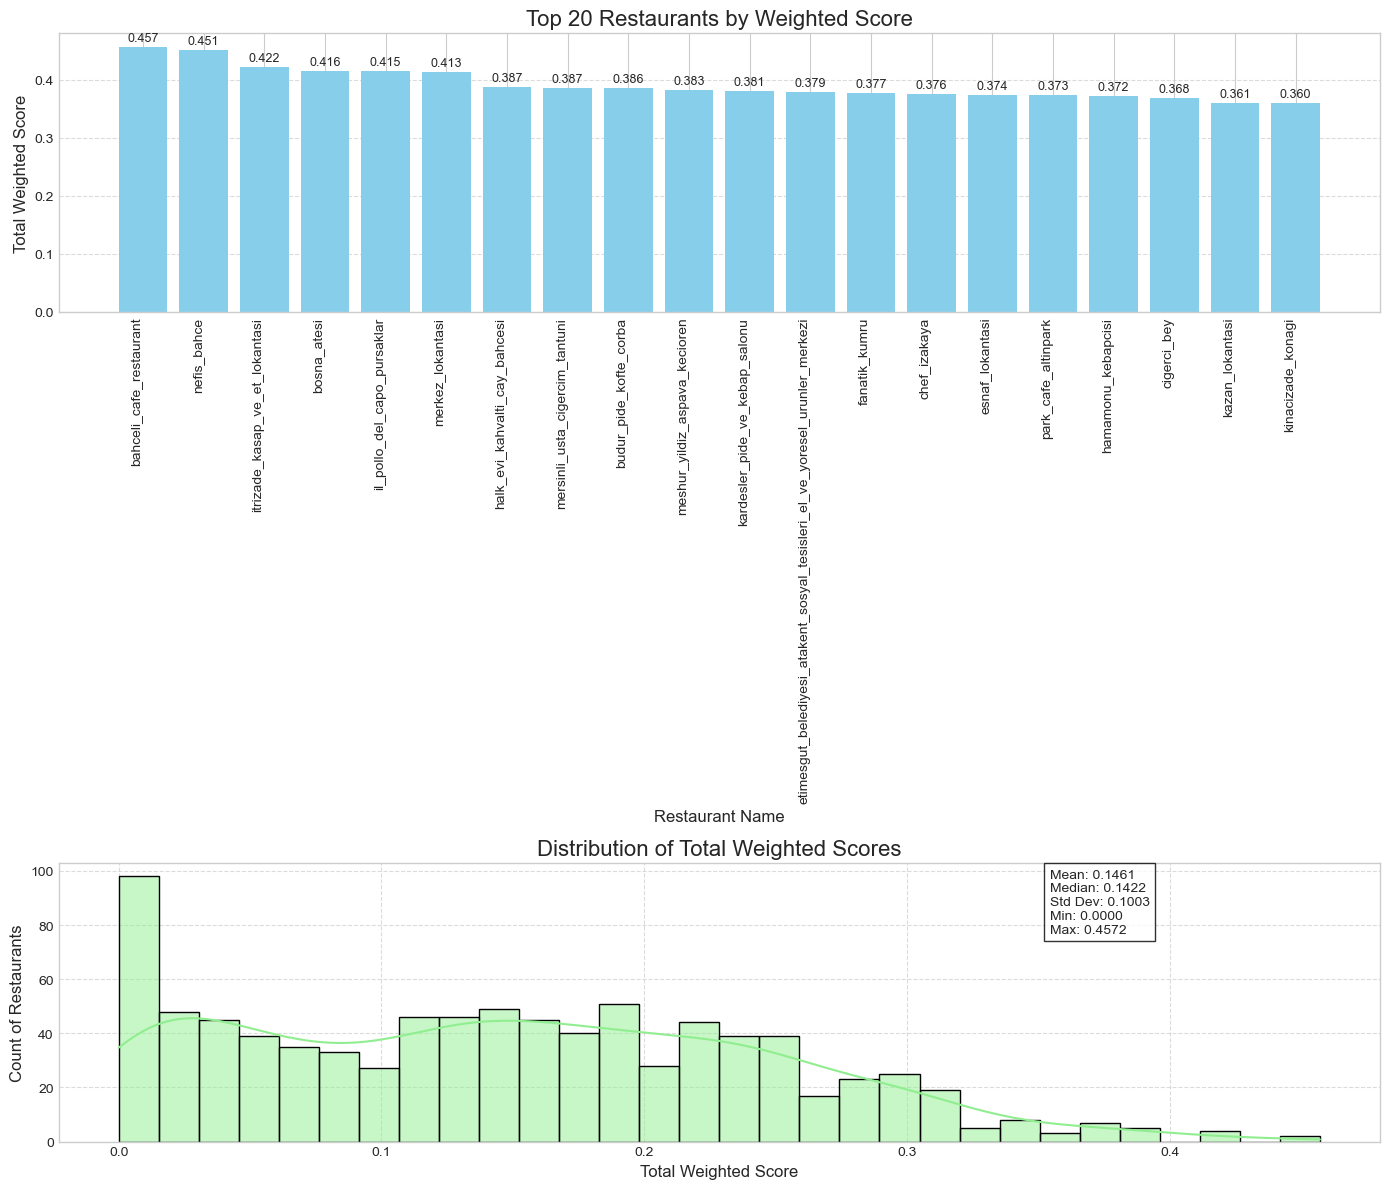

In [72]:
# Sort restaurants by their Total_Weighted_Score in descending order
sorted_restaurants = weight_calculation.sort_values('Total_Weighted_Score', ascending=False).reset_index(drop=True)

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# 1. Top 20 restaurants bar plot
top_20 = sorted_restaurants.head(20)
ax1 = axes[0]
bars = ax1.bar(top_20['Mekan_Adı'], top_20['Total_Weighted_Score'], color='skyblue')
ax1.set_title('Top 20 Restaurants by Weighted Score', fontsize=16)
ax1.set_xlabel('Restaurant Name', fontsize=12)
ax1.set_ylabel('Total Weighted Score', fontsize=12)
ax1.set_xticklabels(top_20['Mekan_Adı'], rotation=90, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# 2. Distribution of weighted scores
ax2 = axes[1]
sns.histplot(weight_calculation['Total_Weighted_Score'], bins=30, kde=True, ax=ax2, color='lightgreen')
ax2.set_title('Distribution of Total Weighted Scores', fontsize=16)
ax2.set_xlabel('Total Weighted Score', fontsize=12)
ax2.set_ylabel('Count of Restaurants', fontsize=12)
ax2.grid(linestyle='--', alpha=0.7)

# Add statistics
stats_text = (f"Mean: {weight_calculation['Total_Weighted_Score'].mean():.4f}\n"
              f"Median: {weight_calculation['Total_Weighted_Score'].median():.4f}\n"
              f"Std Dev: {weight_calculation['Total_Weighted_Score'].std():.4f}\n"
              f"Min: {weight_calculation['Total_Weighted_Score'].min():.4f}\n"
              f"Max: {weight_calculation['Total_Weighted_Score'].max():.4f}")
ax2.text(0.75, 0.75, stats_text, transform=ax2.transAxes, 
        bbox=dict(facecolor='white', alpha=0.8), fontsize=10)

plt.tight_layout()
plt.show()

In [75]:
weight_calculation.to_csv('/Users/Serra/Desktop/bitirme/kullanılan csvler/Restoran_Weighted_Scores.csv', index=False)